Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

Bibliographie:

Voir,

* Landau & Lifshitz "Mécanique"
* Goldstein "Classical Mechanics"

# Angles d'Euler

## Matrices de changement de coordonnées

### Rotation d'un repère

La rotation des *axes de coordonnées* $(\bm e_X,\bm e_Y,\bm e_Z)$ d'un angle $\phi$ autour de $\bm n$ est donnée par la matrice de changement de coordonnées:
$$ C_{\bm n}(\phi) = R_{\bm n}(\phi)^{\mathrm{T}} = R_{\bm n}(-\phi)$$
qui est en fait la transposée de la matrice de rotation $R_{\bm n}(\phi)$. 

Les matrices $C$ pertmettent de passer du repère fixe au mobile, par exemple
$$\begin{pmatrix} \bm e_x \\ \bm e_y \\ \bm e_z \end{pmatrix} = C_{\bm n}(\phi) \begin{pmatrix} \bm e_X \\ \bm e_Y \\ \bm e_Z \end{pmatrix}.$$

Les rotations autour des axes $X$, $Y$ et $Z$ sont:
\begin{align*} C_X(\phi) &= \begin{pmatrix} 1 & 0 & 0 \\ 0 & \cos \phi & \sin \phi \\ 0 & -\sin \phi & \cos \phi \end{pmatrix}\\
C_Y(\phi) &= \begin{pmatrix} \cos \phi & 0 & -\sin \phi \\ 0 & 1 & 0 \\ \sin \phi & 1 & \cos \phi\end{pmatrix}\\
C_Z(\phi) &= \begin{pmatrix} \cos \phi & \sin \phi & 0 \\ -\sin \phi & \cos \phi & 0 \\ 0 & 0 & 1 \end{pmatrix}
\end{align*}

### Remarque: rotation d'un vecteur

Notez la différence entre $R$ et $C$: la matrice de rotation s'applique à un vecteur pour en obtenir un autre, tandis que la matrice de changement de coordonnées s'applique aux axes d'un repère pour obtenir un nouveau repère.

En effet, pare exemple la rotation d'un *vecteur* $\bm r = (x,y,z)$ d'un angle $\phi$ autour de l'axe $Z$ (disons) est donnée par la matrice:
$$R_{Z}(\phi) = \begin{pmatrix} \cos \phi & -\sin \phi & 0 \\ \sin \phi & \cos \phi & 0 \\ 0 & 0 & 1 \end{pmatrix}$$
On a donc
$$ \bm r' = R_Z(\phi) \bm r$$

Par contre, le vecteur $\bm r = (X,Y,Z)$ dans le repère $(\bm e_X,\bm e_Y,\bm e_Z)$, s'écrit dans les coordonnées d'un autre repère $\bm r' = (\bm e_x,\bm e_y,\bm e_z)$, après une rotation d'axe $\bm e_Z$ et d'angle $\phi$, comme:
$$ \bm r' = C_Z(\phi) \bm r$$
avec
$$C_{Z}(\phi) = \begin{pmatrix} \cos \phi & \sin \phi & 0 \\ -\sin \phi & \cos \phi & 0 \\ 0 & 0 & 1 \end{pmatrix}$$
La différence par rapport à l'équation précédente, c'est qu'ici $\bm r$ et $\bm r'$ sont le *même* vecteur, mais exprimé par des coordonnées différentes, tandis qu'auparavant $\bm r$ et $\bm r'$ étaient différents, mais dont le repère était le même. Notez toutefois que les deux transformations sont données par des matrices transposées l'une de l'autre, $C_Z(\phi) = R_Z(-\phi)$.

## Angles $(\psi,\theta,\phi)$

Ils décrivent le passage du repère fixe $(\bm e_X,\bm e_Y,\bm e_Z)$ au repère mobile $(\bm e_x,\bm e_y,\bm e_z)$
Les angles d'Euler sont

* $\psi$, l'angle de précesion
* $\theta$, l'angle de nutation
* et $\phi$, l'angle de rotation (propre)

$\psi$ est une rotation autour de l'axe $\bm e_Z$ du repère fixe; $\theta$ est un rotation autour de la ligne nodale $\bm N$; enfin, $\phi$ est une rotation autour de l'axe $e_z$ mobile (ou fixé au solide). Dans la littérature physique vous allez souvent trouver l'échange de $\psi$ et $\phi$, dans la notation des angles.

La transformation du reprère fixe au repère mobile, décrites par ces trois angles, s'obtient par une serie de trois rotations:

1. On part $(\bm e_X,\bm e_Y,\bm e_Z)$, et on fait une rotation d'angle $\psi$ autour de $Z$ pour obtenir le repère $(\bm N,\bm e_{y'},\bm e_Z)$ ($N$ et $y'$ sont les images de $X$ et $Y$)

2. On fait une rotation de $\theta$ autour de $\bm e_N$ (la ligne nodale), on obtient un noveau reprère $(\bm e_N,\bm e_{y''},\bm e_z)$

3. Enfin, on obtient le repère mobile $(\bm e_x,\bm e_y,\bm e_z)$, après une rotation d'angle $\phi$ autour de $\bm e_z$

En utilisant les matrices de rotation successivement, on a simplement:
$$ \begin{pmatrix} \bm e_x \\ \bm e_y \\ \bm e_z \end{pmatrix} = C_Z(\phi) C_X(\theta) C_Z(\psi) \begin{pmatrix} \bm e_X \\ \bm e_Y \\ \bm e_Z \end{pmatrix}$$

Ou en forme explicite
$$C(\psi, \theta, \phi) = \begin{pmatrix}- \cos\theta  \sin\psi \sin\phi + \cos\psi \cos\phi &  \cos\theta \cos\psi \sin\phi + \sin\psi \cos\phi & \sin\theta \sin\phi \\ -\cos\theta \sin\psi \cos\phi - \cos\psi \sin\phi & \cos\theta \cos\psi \cos\phi - \sin\psi \sin\phi & \sin\theta \cos\phi \\  \sin\theta \sin\psi  & - \sin\theta \cos\psi & \cos\theta \end{pmatrix}$$

Notez que la transformation inverse est donnée par:
$$C(\psi, \theta, \phi)^\mathrm{T} = R_Z(\psi) R_X(\theta) R_Z(\phi)$$
(on a utilisé $R_n(-\alpha)^\mathrm{T} = R_n(\alpha)$ pour $n$ et $\alpha$ arbitraires), elle permet de passer du repère mobile au repère fixe.

In [5]:
# matrices de changement de repère

phi, theta, psi = sy.symbols("phi, theta, psi", real=True)

def C_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, s],
                  [0, -s,  c]])
def C_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, -s],
                  [ 0, 1, 0],
                  [s, 0, c]])

def C_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, s, 0],
                  [-s,  c, 0],
                  [0,  0, 1]])

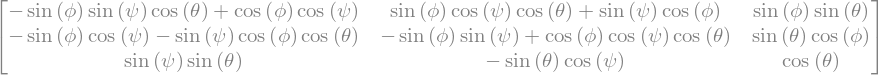

In [6]:
# Changement de base (repère)
C = C_z(phi)*C_x(theta)*C_z(psi)
C

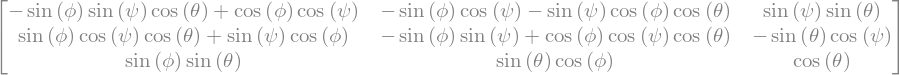

In [7]:
# Rotation: matrice inverse (transposée de C)
CT = C_z(-psi)*C_x(-theta)*C_z(-phi)
CT

# Vitesse de rotation

La vitesse angulaire $\bm \Omega$ s'écrit facilement en utilisant les axes de rotation respectifs:
$$\bm \Omega\big|_{(Z,N,z)} = \dot{\psi} \bm e_Z + \dot{\theta} \bm e_N + \dot{\phi} \bm e_z$$
où nous notons les noms de coordonnées (remarquez que ces axes ne forment pas un repère orthogonal).

Pour avoir son expression explicite dans le repère mobile il suffit de faire les rotations nécessaires pour passer d'un repère à un autre. Le vecteur $\bm e_Z = (0,0,1)$ devient dans la base mobile:
$$ C(\psi, \theta, \phi) \bm e_Z = C_Z(\phi)C_X(\theta) \begin{pmatrix}   \sin\theta \sin\phi \\ \sin\theta \cos\phi \\ \cos\theta \end{pmatrix}$$
($Z$ est tranformé par les trois rotations des axes, notez cependant que $C_Z(\psi)$ agit comme l'identité sur l'axe $Z$) et le vecteur $\bm e_N =(1,0,0)$ devient,
$$C_Z(\phi)C_X(\theta) \bm e_N = C_Z(\phi) \bm e_N = \begin{pmatrix} \cos\phi \\ - \sin\phi \\ 0 \end{pmatrix}$$
(il est transformé lors de l'étape 3 dans la définition des angles d'Euler, la rotation d'axe $X$ actue comme l'identité sur $N$).

En remplaçant dans $\bm \Omega$, on transforme ses "coordonnées" $(Z,N,z)$, en coordonnées du repère mobile:
$$\bm \Omega\big|_{(x,y,z)} = \dot{\psi} C_Z(\phi)C_X(\theta) \bm e_Z + \dot{\theta} C_Z(\phi)\bm e_N + \dot{\phi} \bm e_z$$
on obtient finalement l'expression de la vitesse angulaire dans le repère du solide:
$$\bm \Omega =  \begin{pmatrix} \dot{\psi} \sin \theta \sin \phi + \dot{\theta} \cos\phi \\ \dot{\psi} \sin\theta \cos\phi - \dot{\theta} \sin\phi \\ \dot{\psi}\cos\theta + \dot{\phi} \end{pmatrix}$$

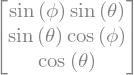

In [8]:
 C_z(phi)*C_x(theta)*sy.Matrix([0,0,1])

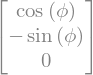

In [9]:
C_z(phi)*sy.Matrix([1,0,0])

# Brouillon

In [11]:
print(sy.latex(C))

\left[\begin{matrix}- \sin{\left(\phi \right)} \sin{\left(\psi \right)} \cos{\left(\theta \right)} + \cos{\left(\phi \right)} \cos{\left(\psi \right)} & \sin{\left(\phi \right)} \cos{\left(\psi \right)} \cos{\left(\theta \right)} + \sin{\left(\psi \right)} \cos{\left(\phi \right)} & \sin{\left(\phi \right)} \sin{\left(\theta \right)}\\- \sin{\left(\phi \right)} \cos{\left(\psi \right)} - \sin{\left(\psi \right)} \cos{\left(\phi \right)} \cos{\left(\theta \right)} & - \sin{\left(\phi \right)} \sin{\left(\psi \right)} + \cos{\left(\phi \right)} \cos{\left(\psi \right)} \cos{\left(\theta \right)} & \sin{\left(\theta \right)} \cos{\left(\phi \right)}\\\sin{\left(\psi \right)} \sin{\left(\theta \right)} & - \sin{\left(\theta \right)} \cos{\left(\psi \right)} & \cos{\left(\theta \right)}\end{matrix}\right]
